In [145]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from tqdm import tqdm
import seaborn as sns
random_state =537

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
from prophet import Prophet

In [146]:
#!pip install prophet

In [147]:
df = pd.read_csv("/kaggle/input/metu2023-dataset/final1.csv")
prophet = True

In [159]:
df = df[~df.isin(["X-i","X-ii","Y-i","Y-ii","Y-iii","A-i","A-ii","A"]).any(axis=1)]
df = df.replace("-",0)

14:50:23 - cmdstanpy - INFO - Chain [1] start processing
14:50:23 - cmdstanpy - INFO - Chain [1] done processing


--------------------------------------------------
TOM
**************************************************
(24, 7) (12, 7) (36, 7)


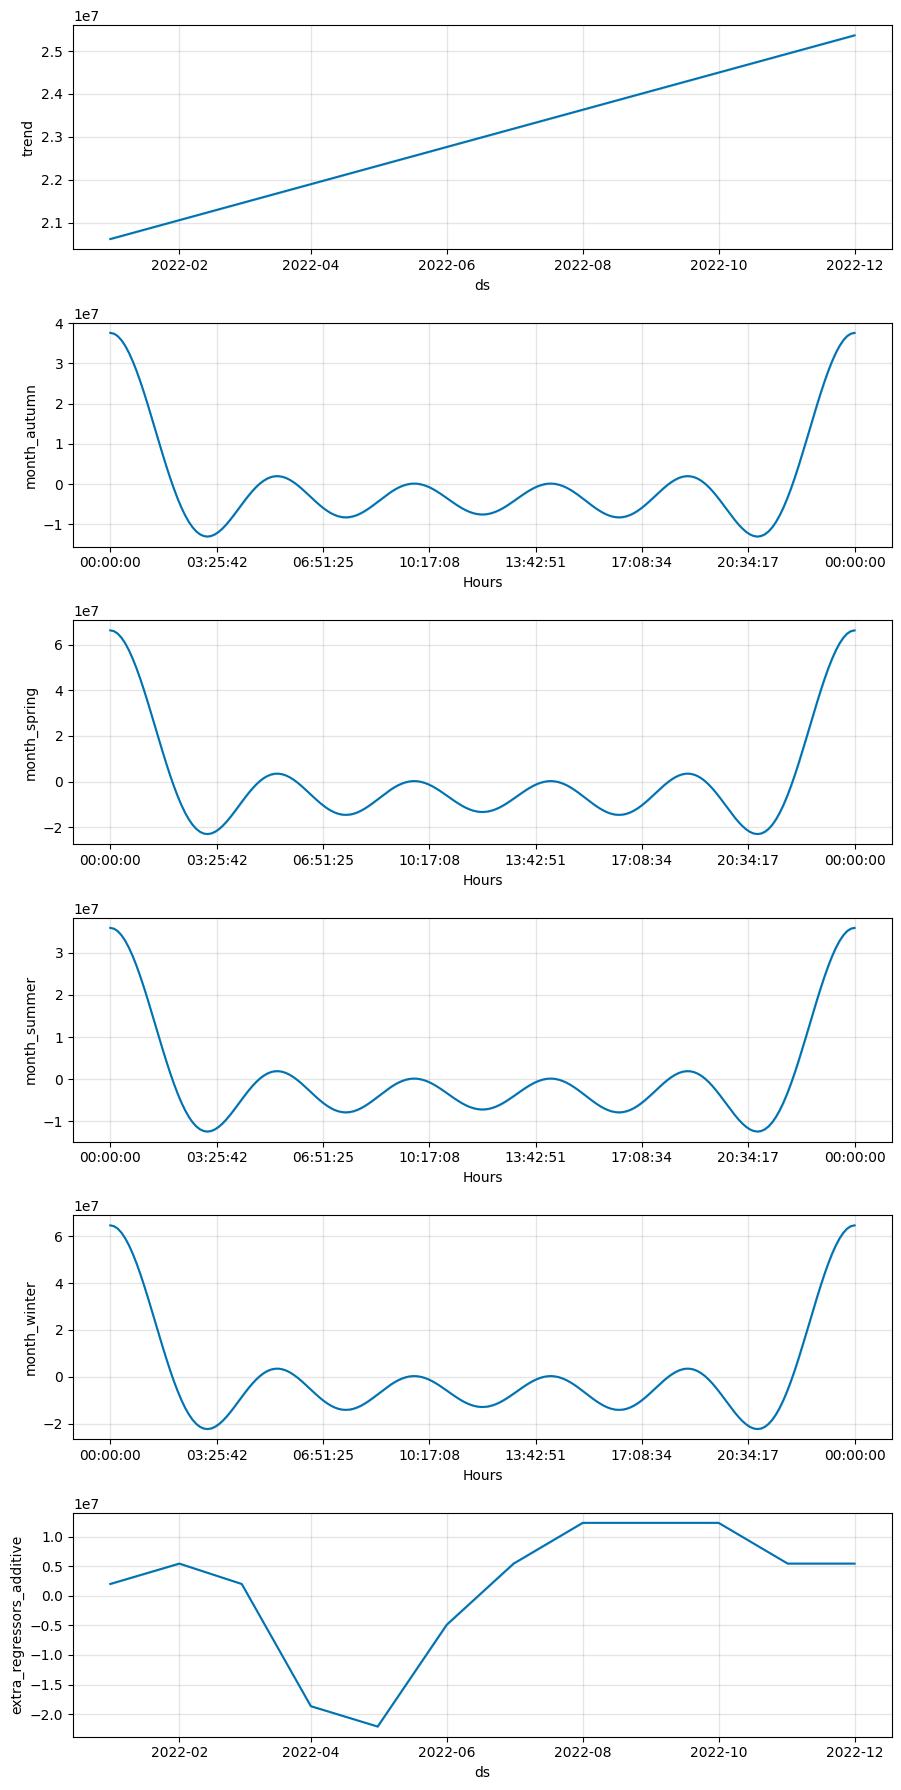

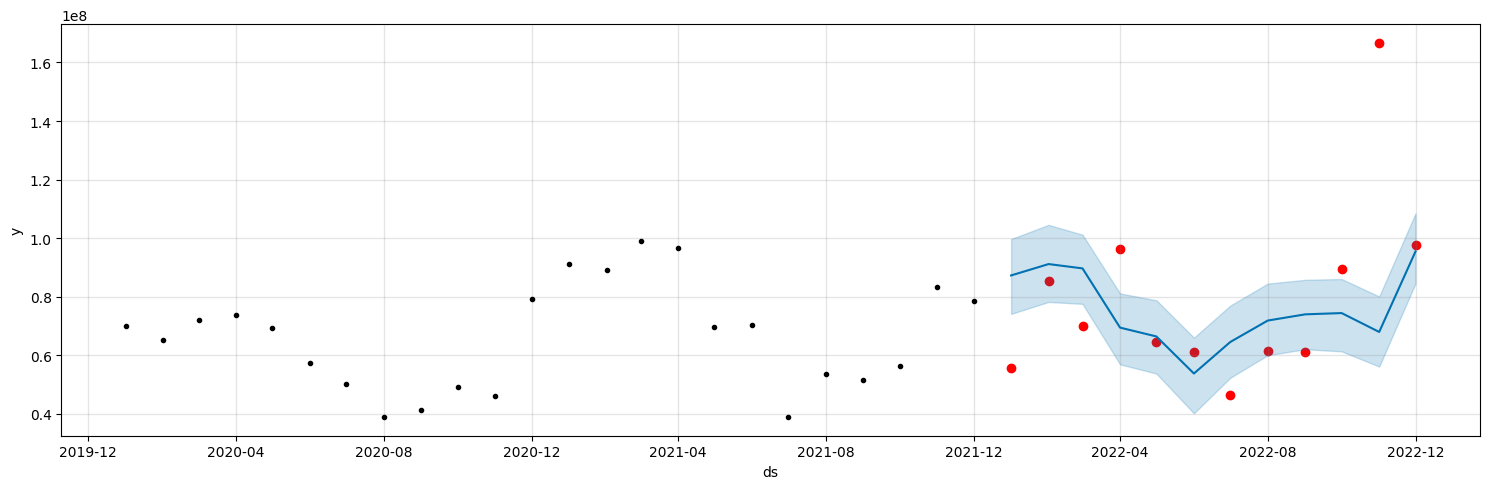

14:50:25 - cmdstanpy - INFO - Chain [1] start processing
14:50:25 - cmdstanpy - INFO - Chain [1] done processing


--------------------------------------------------
Spontaneous Awareness
**************************************************
(24, 7) (12, 7) (36, 7)


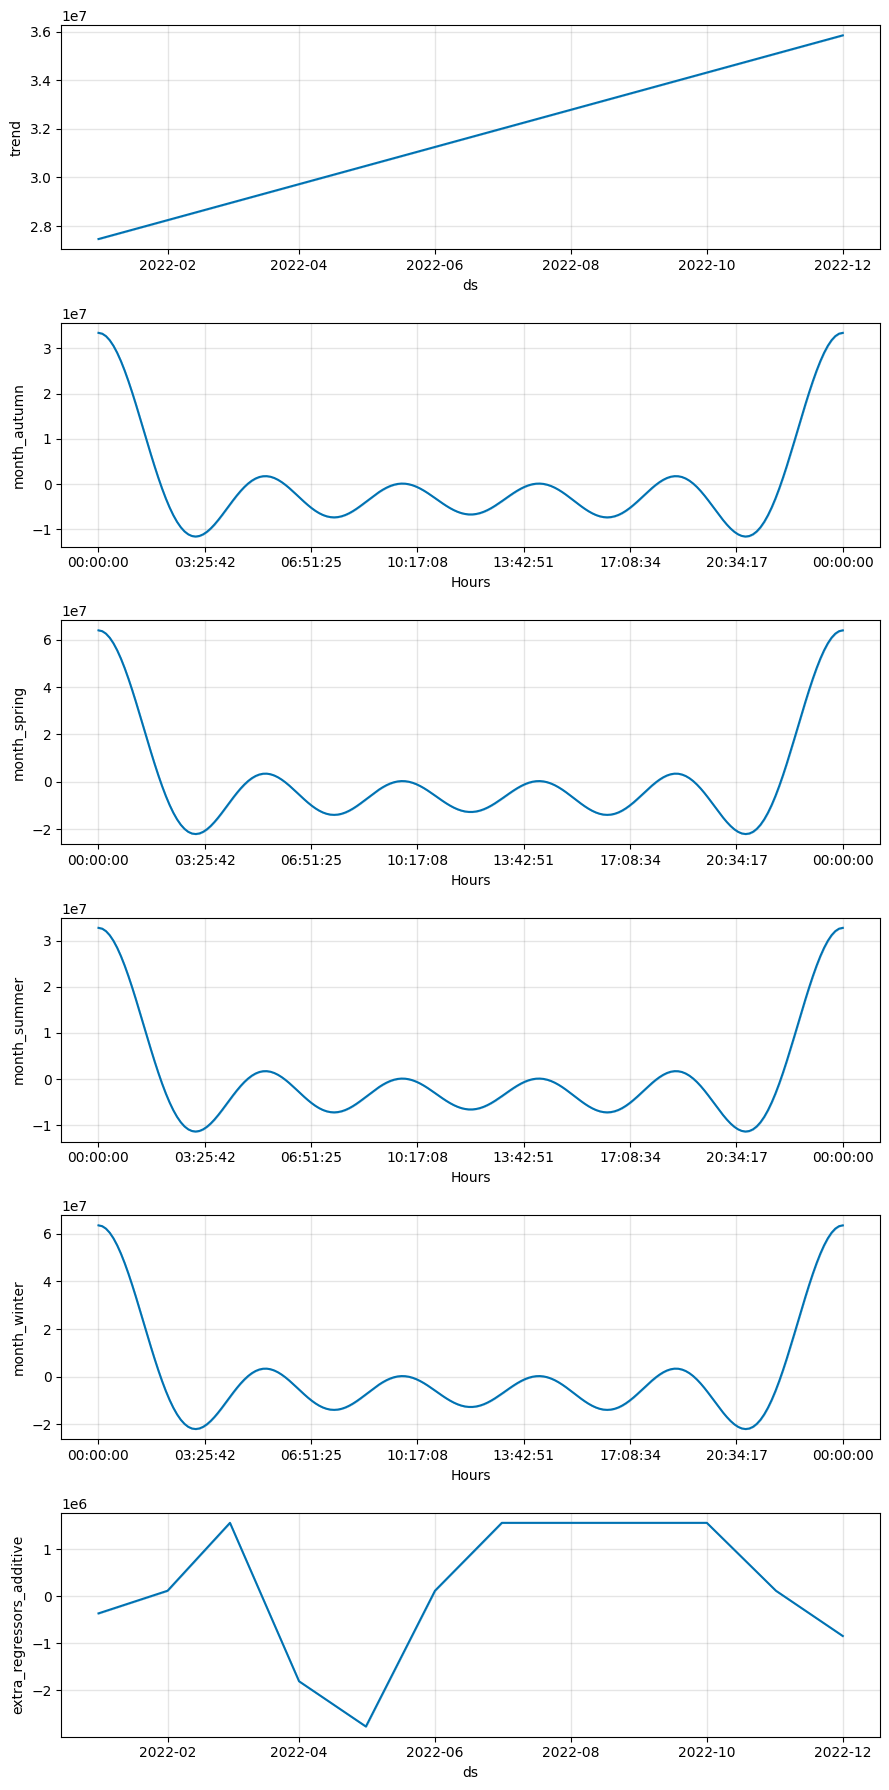

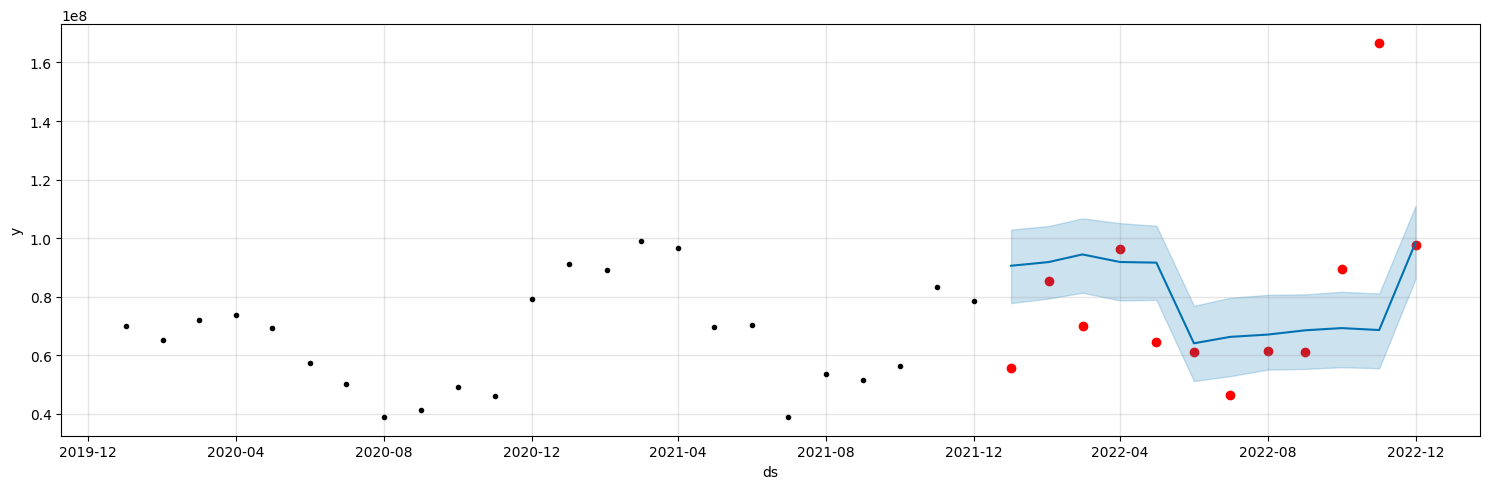

14:50:27 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Awareness
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:28 - cmdstanpy - INFO - Chain [1] done processing


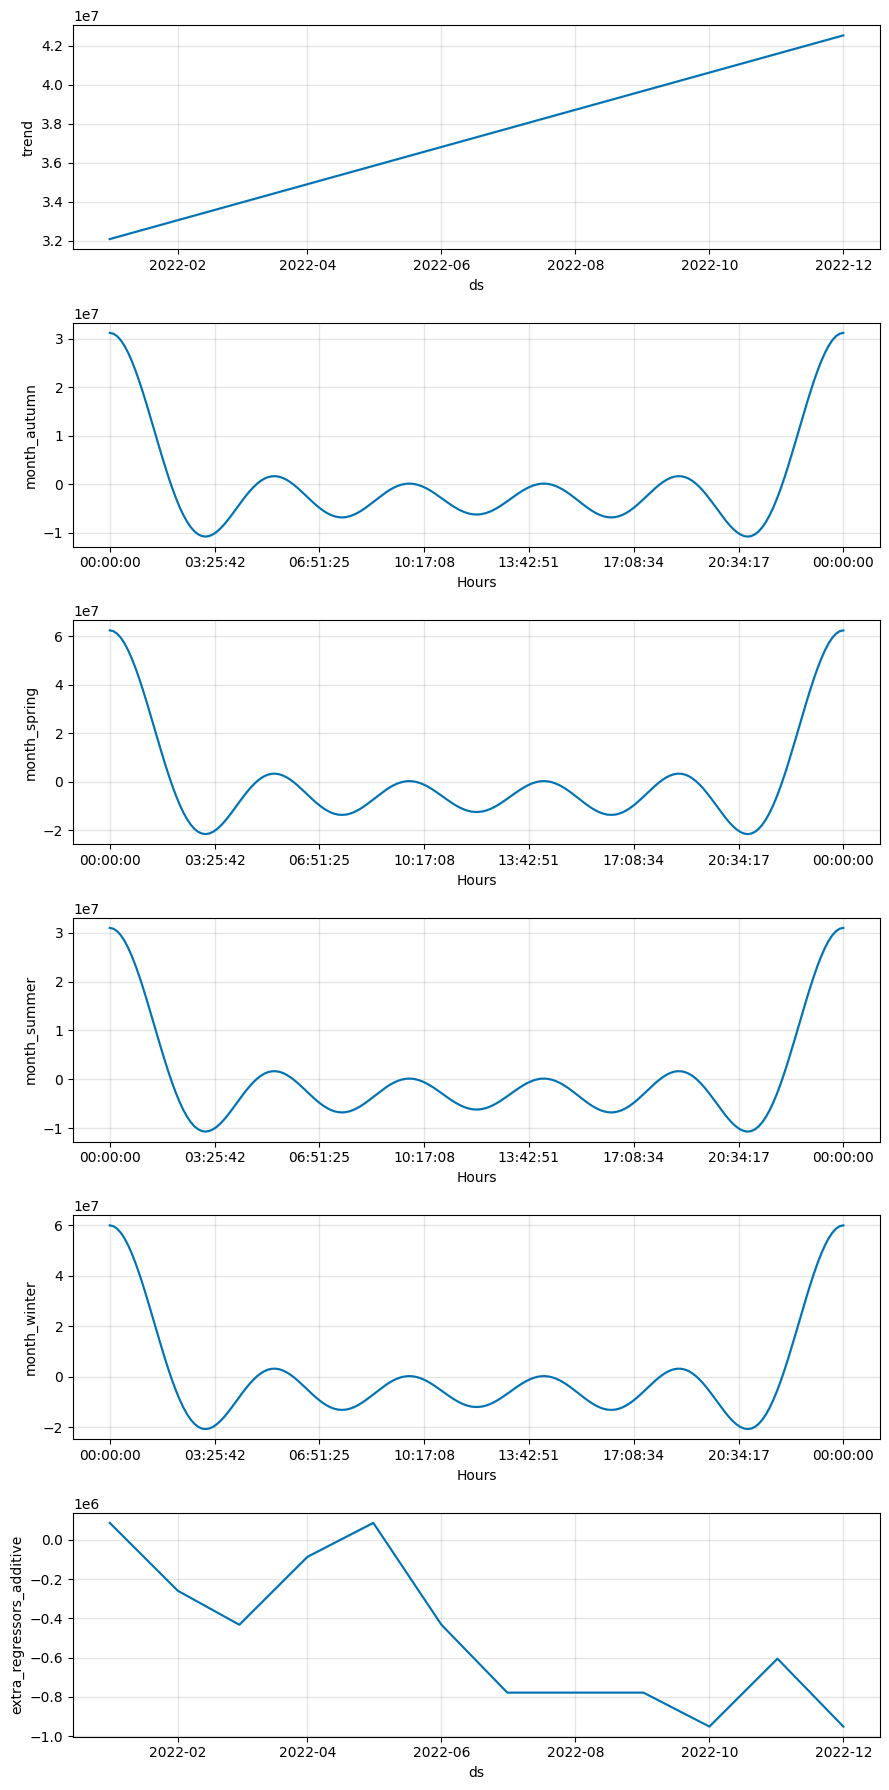

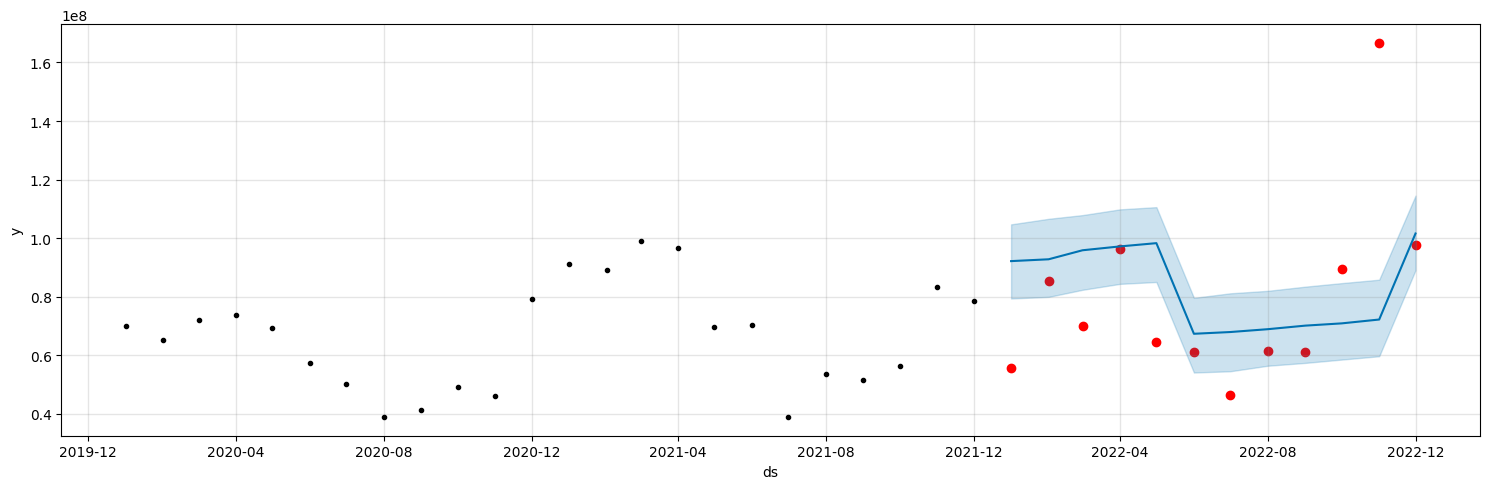

14:50:30 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Ever Used
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:30 - cmdstanpy - INFO - Chain [1] done processing


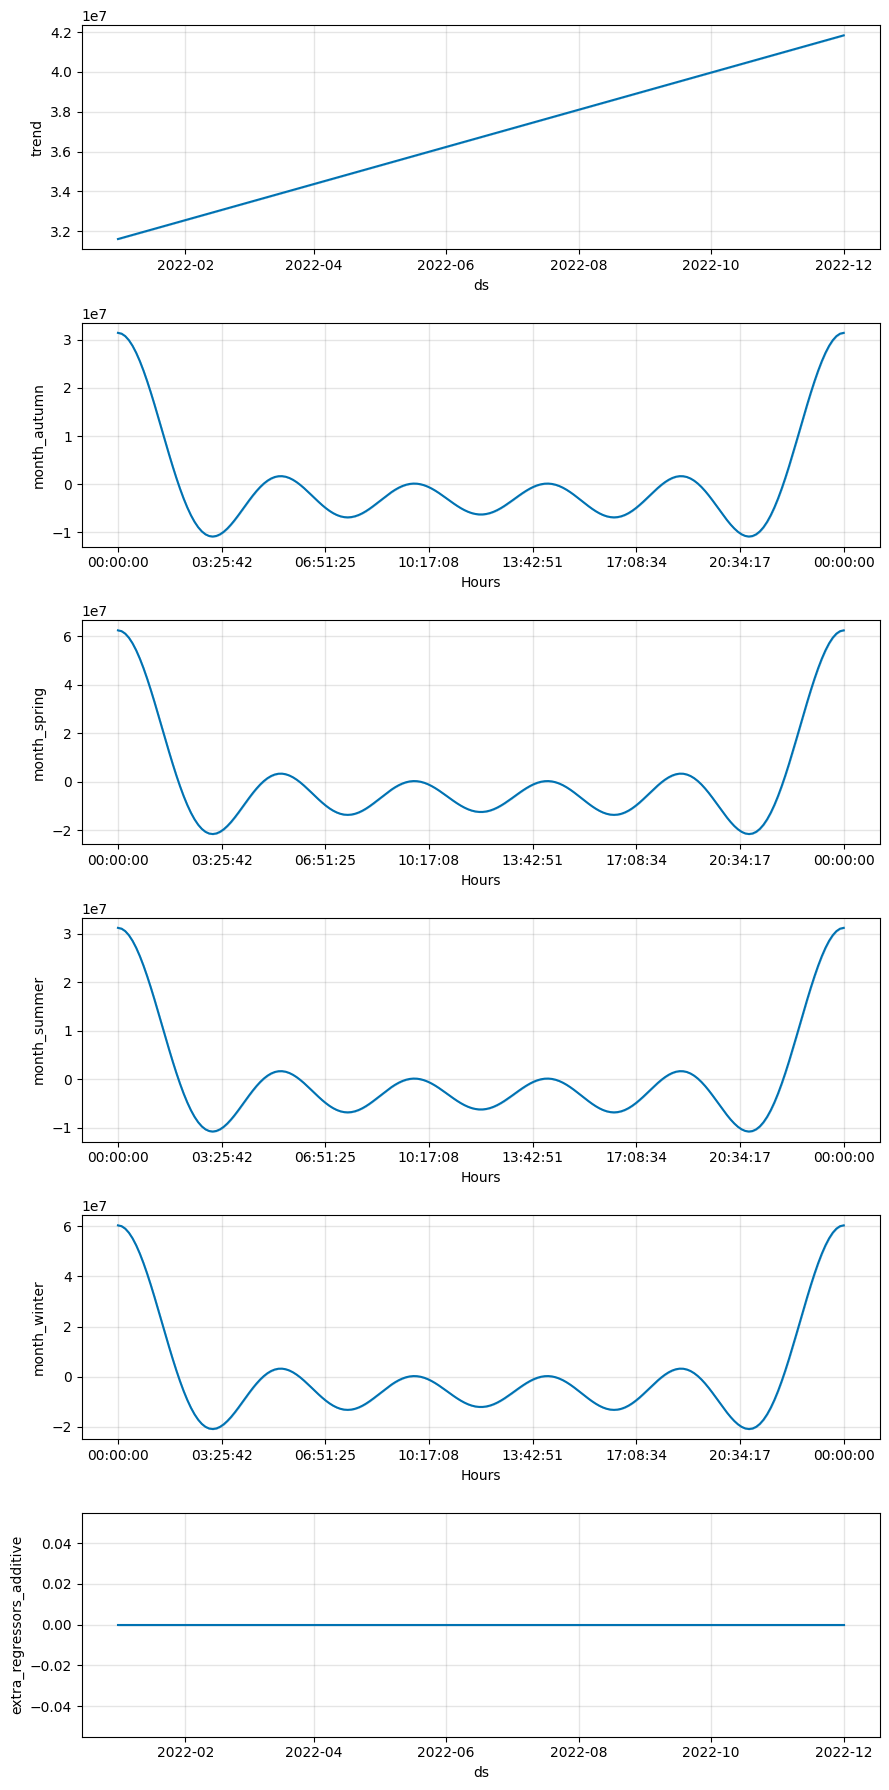

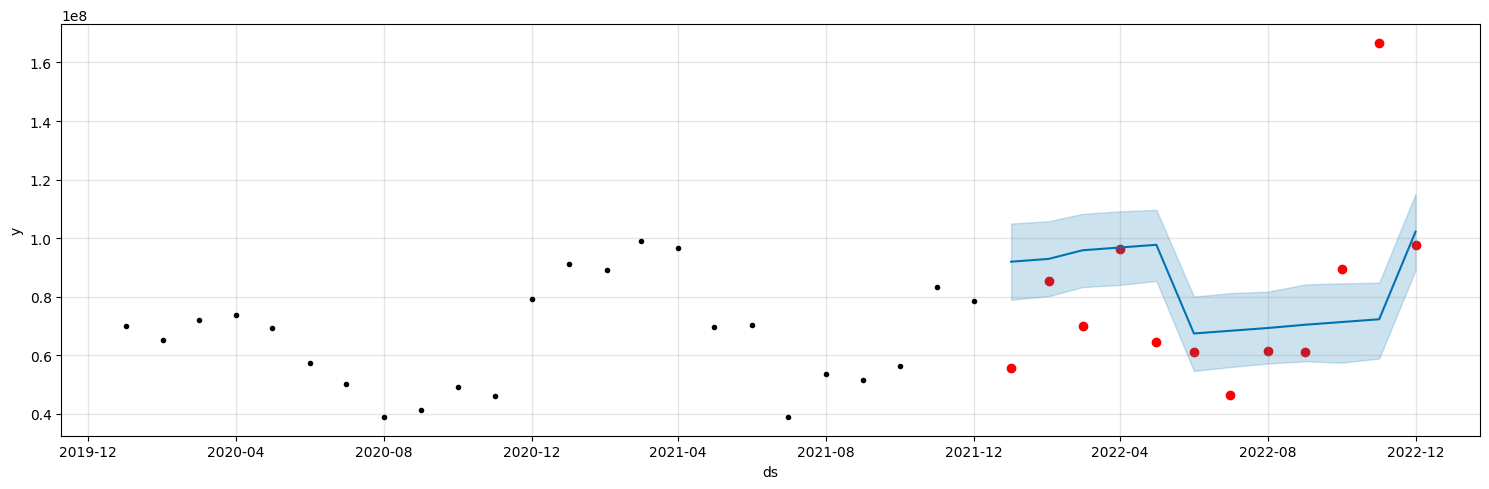

14:50:32 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Trial
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:32 - cmdstanpy - INFO - Chain [1] done processing


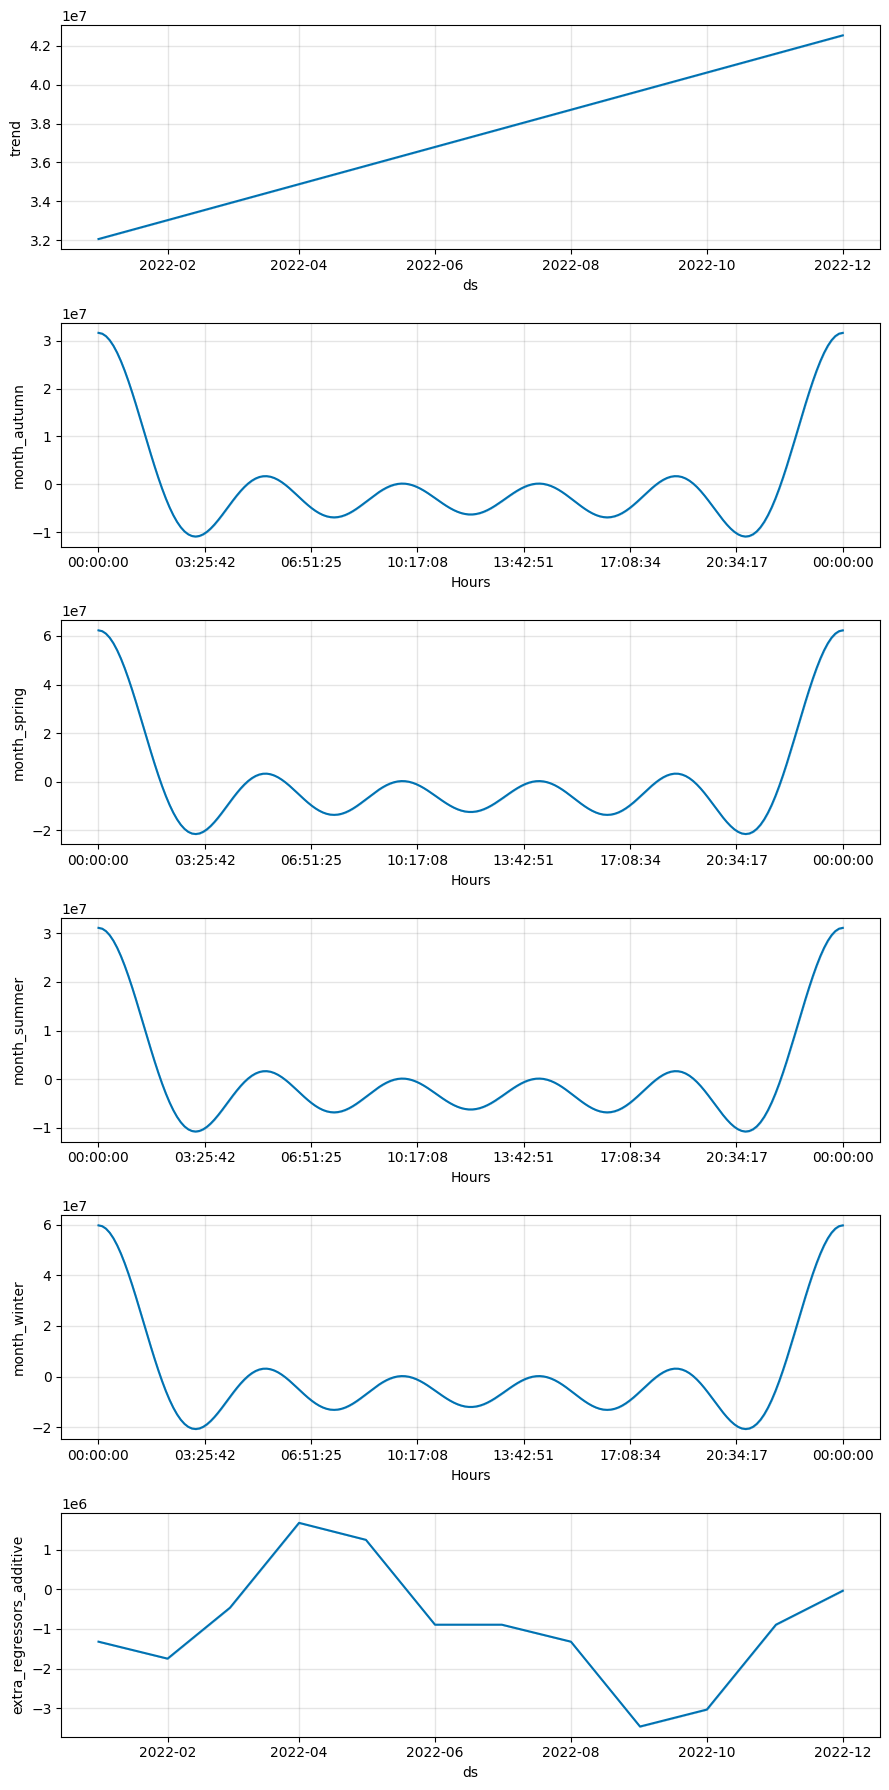

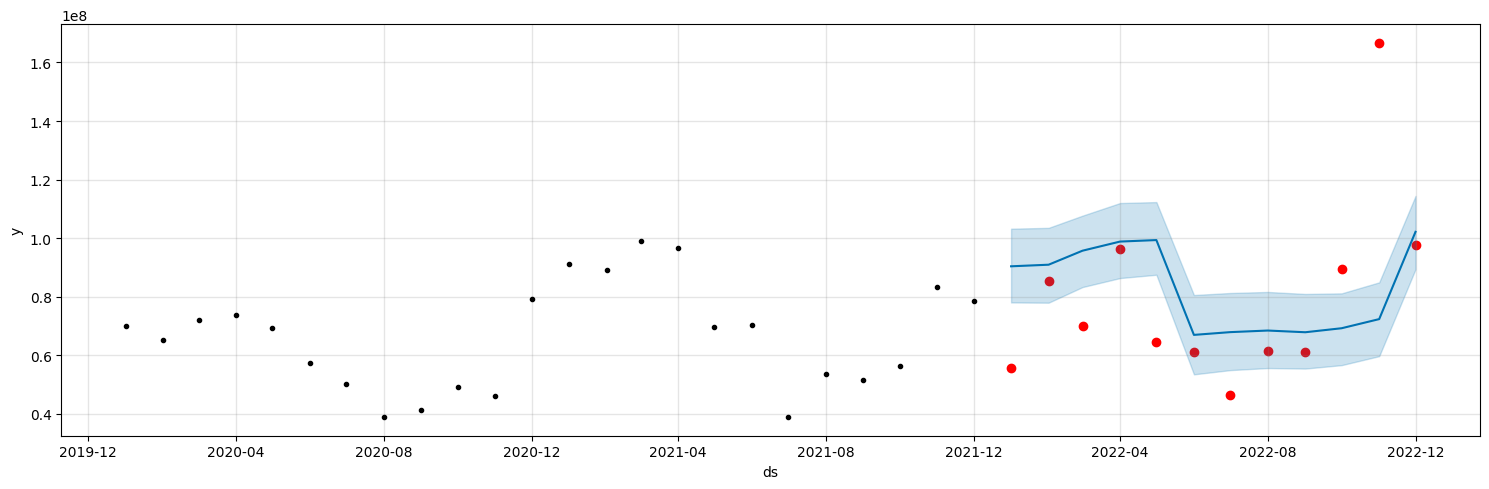

14:50:34 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Repurchase
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:34 - cmdstanpy - INFO - Chain [1] done processing


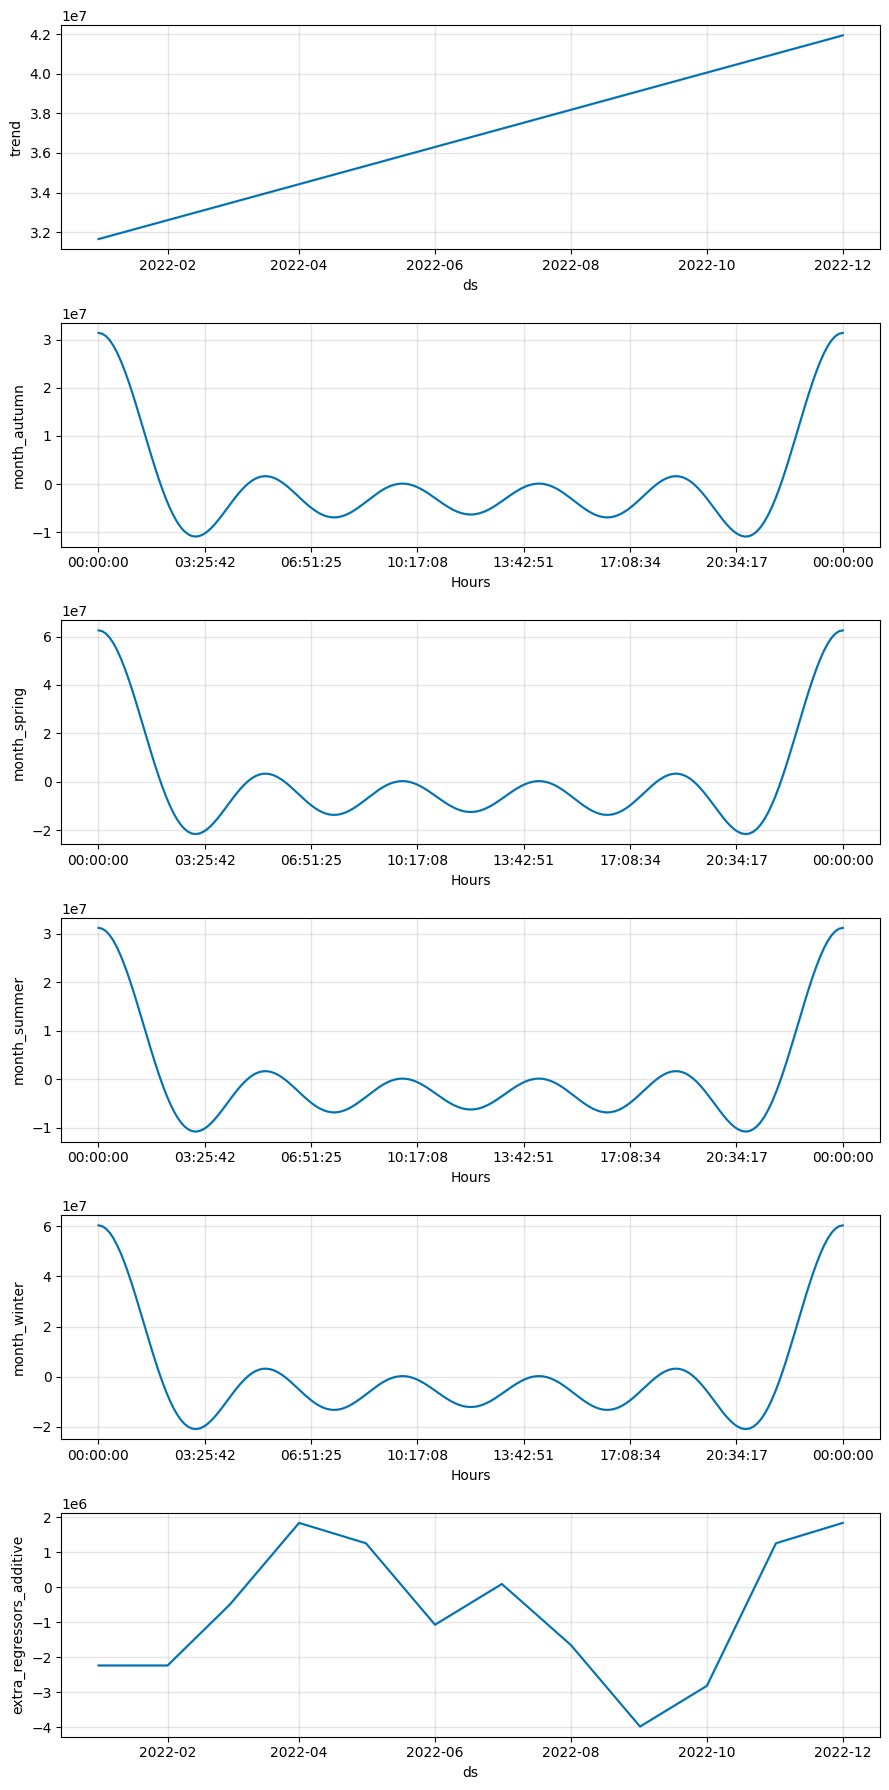

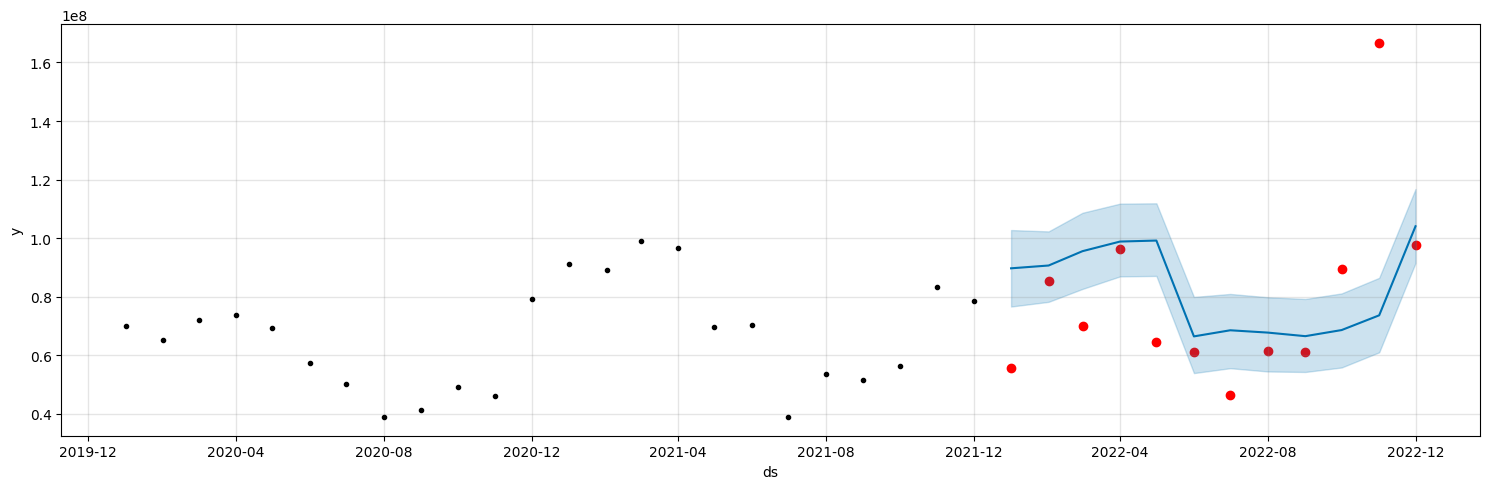

14:50:36 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Most Often
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:37 - cmdstanpy - INFO - Chain [1] done processing


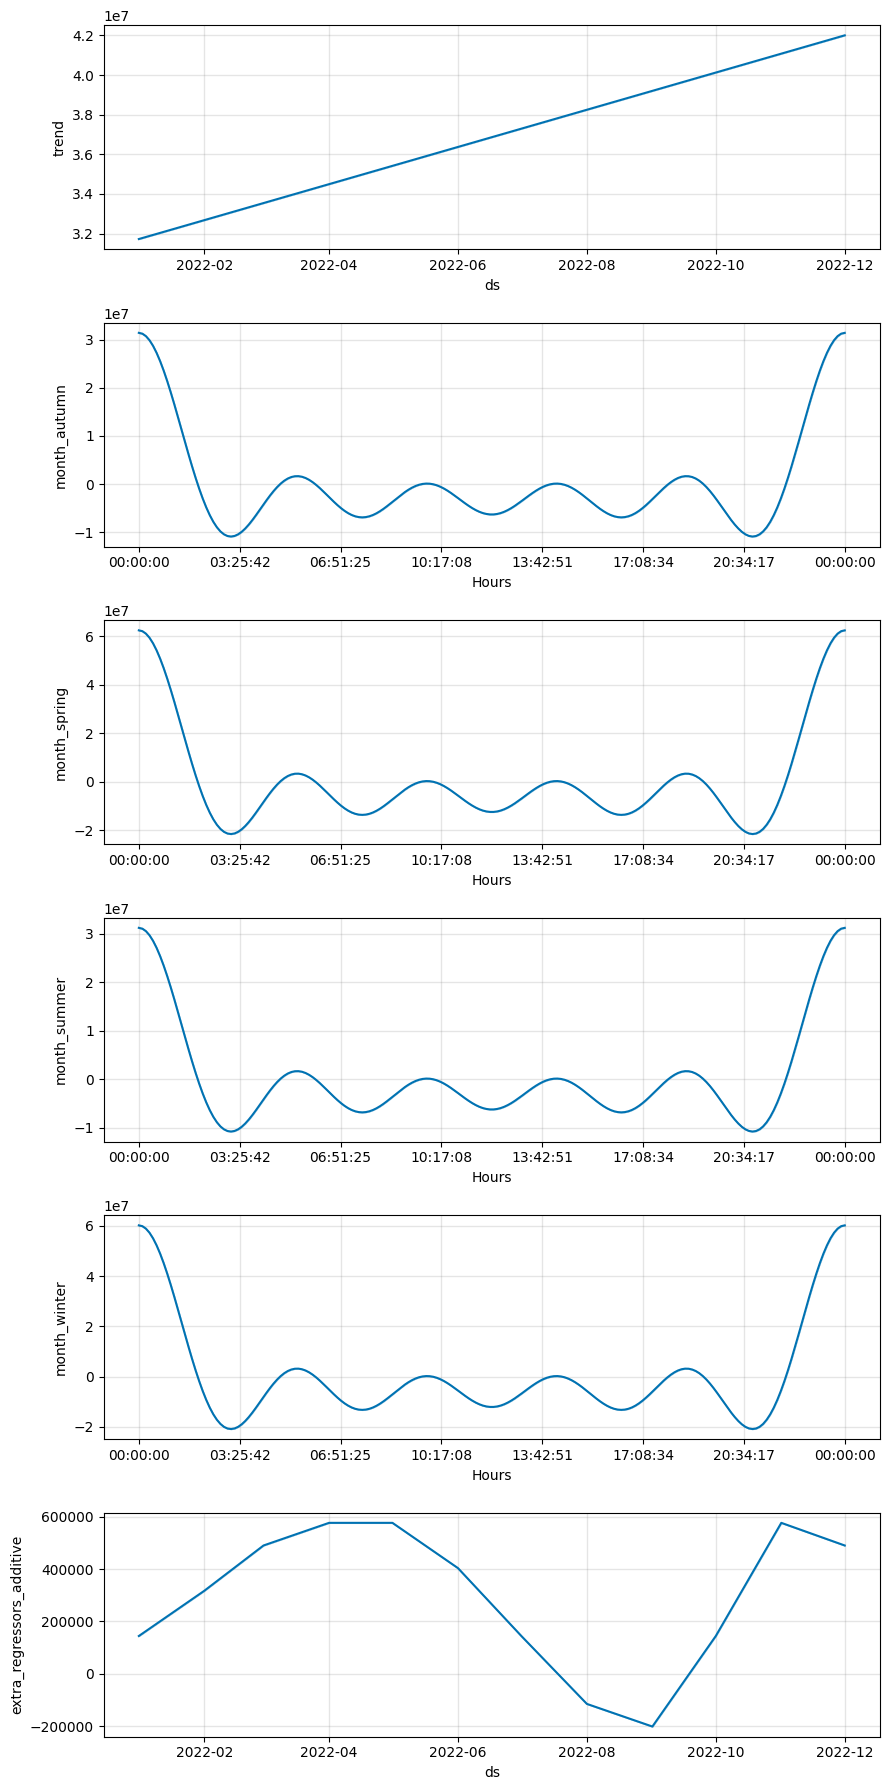

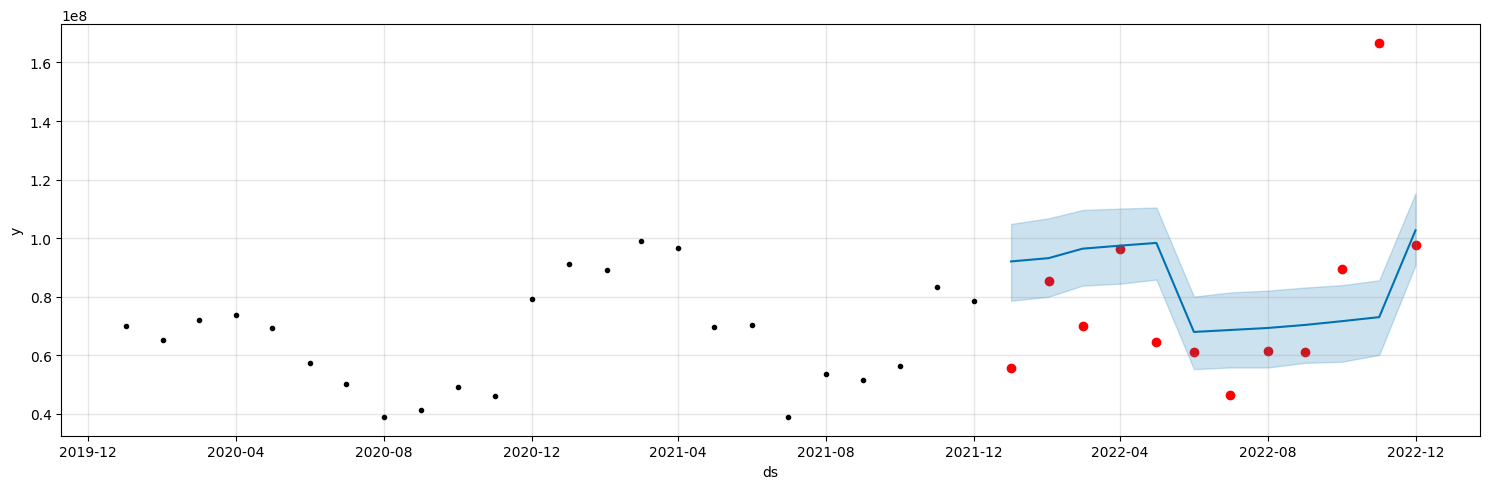

14:50:38 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Performance
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:38 - cmdstanpy - INFO - Chain [1] done processing


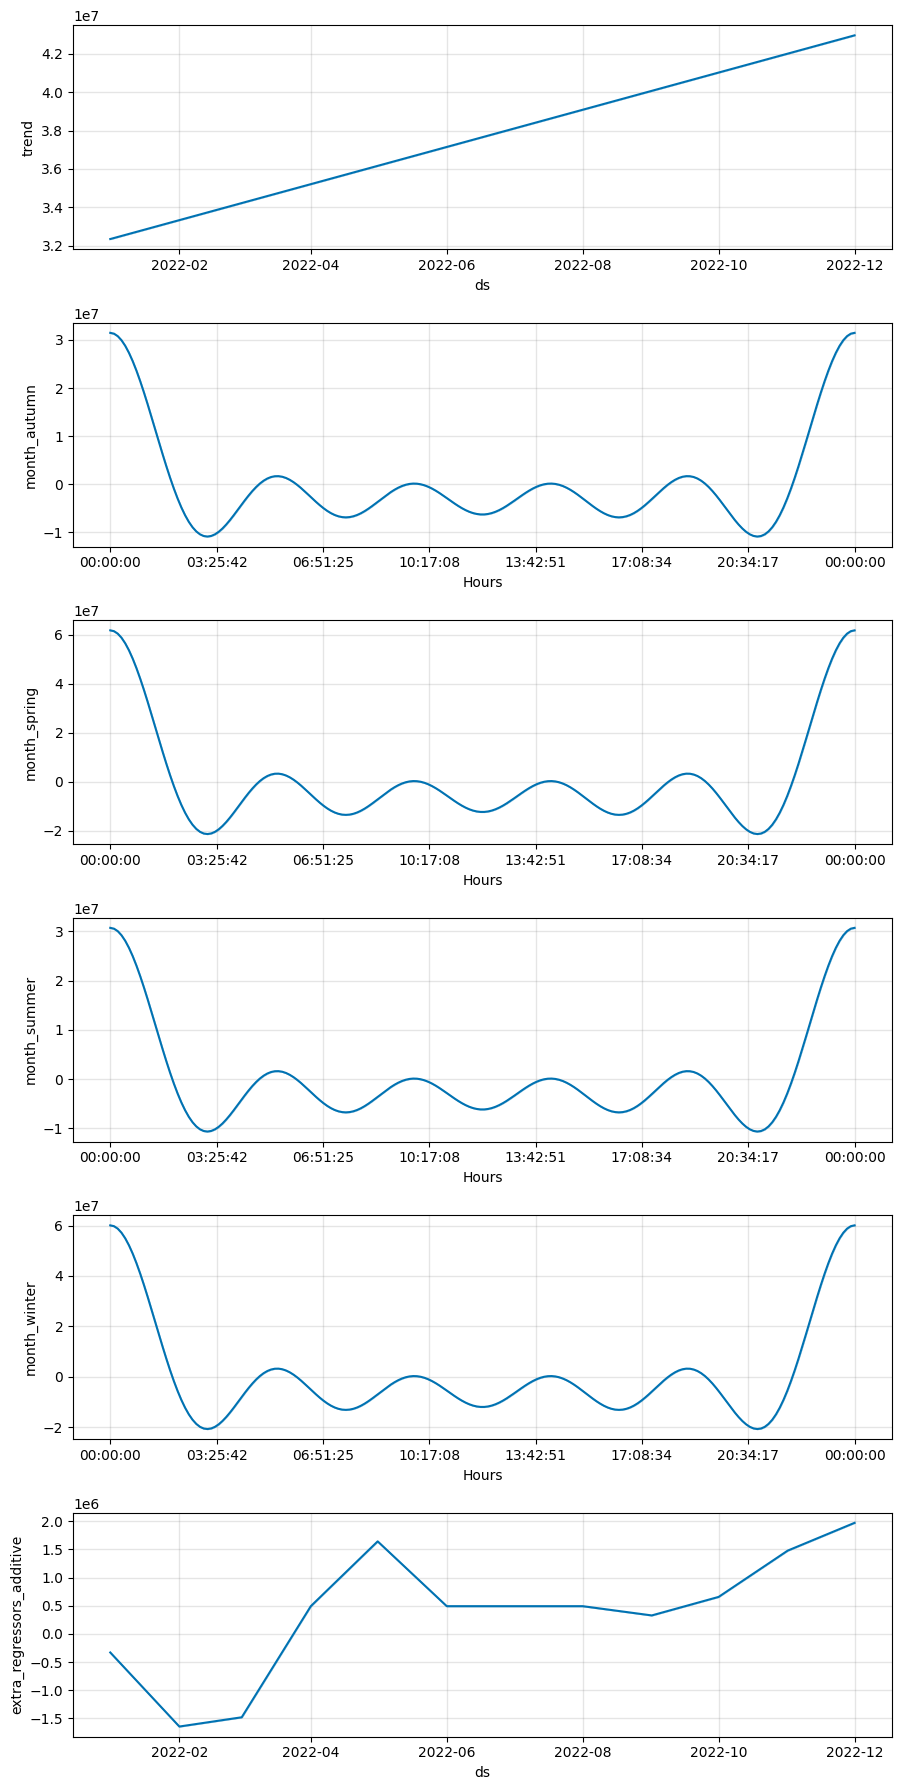

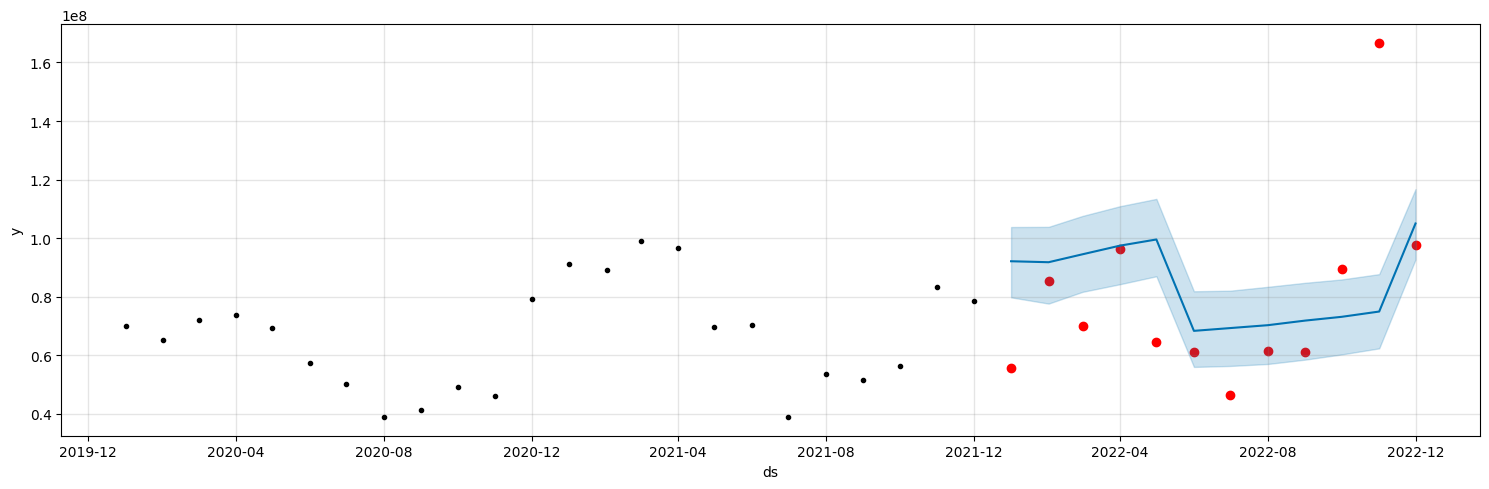

14:50:40 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
Yakınlık
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:40 - cmdstanpy - INFO - Chain [1] done processing


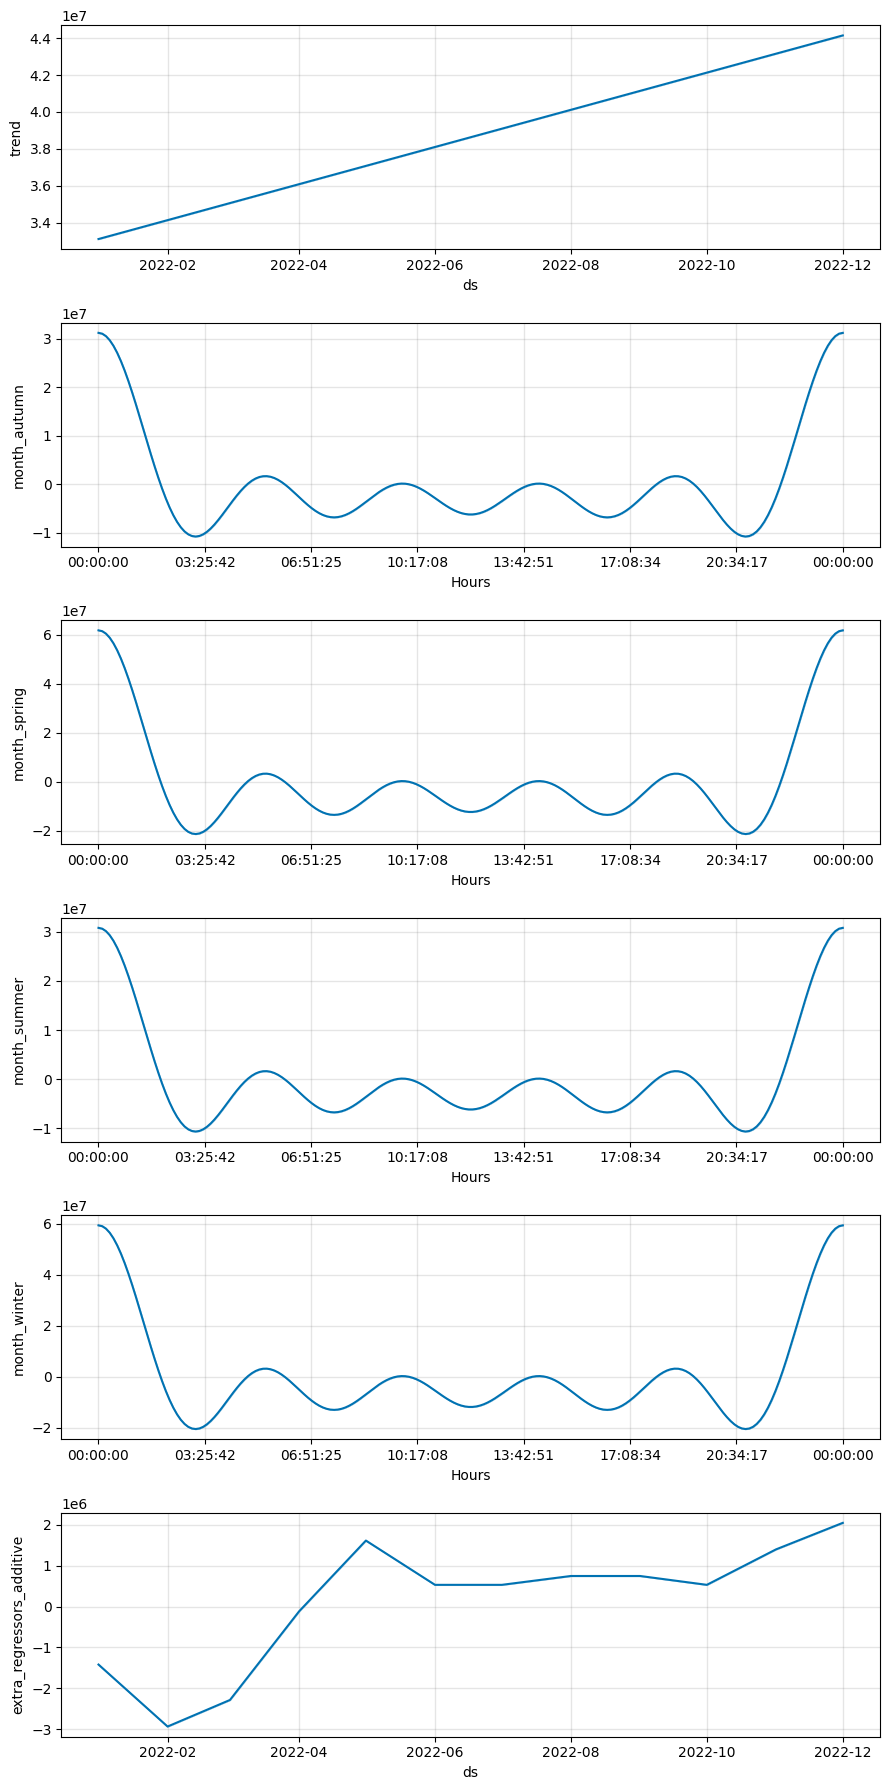

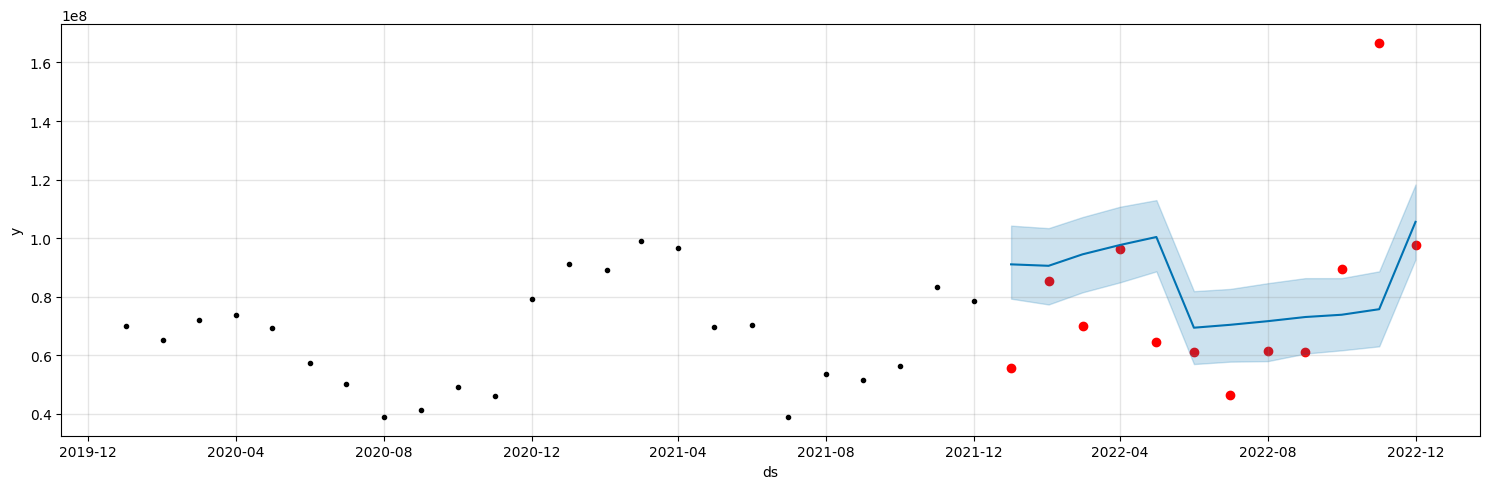

14:50:42 - cmdstanpy - INFO - Chain [1] start processing
14:50:42 - cmdstanpy - INFO - Chain [1] done processing


--------------------------------------------------
Penetration
**************************************************
(24, 7) (12, 7) (36, 7)


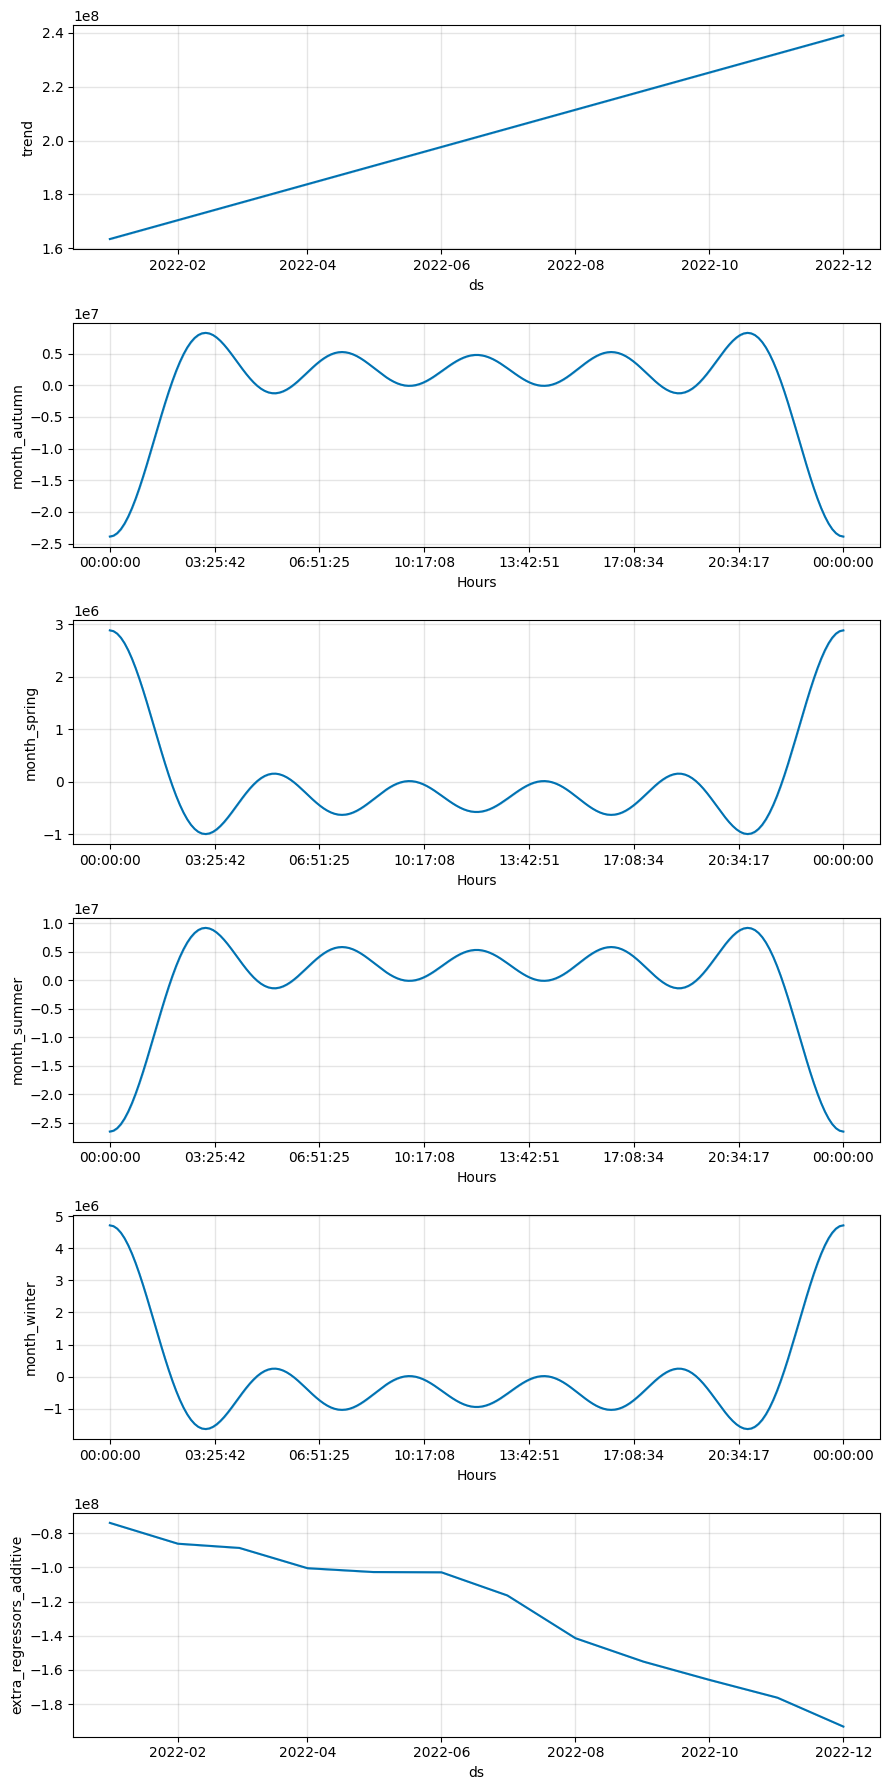

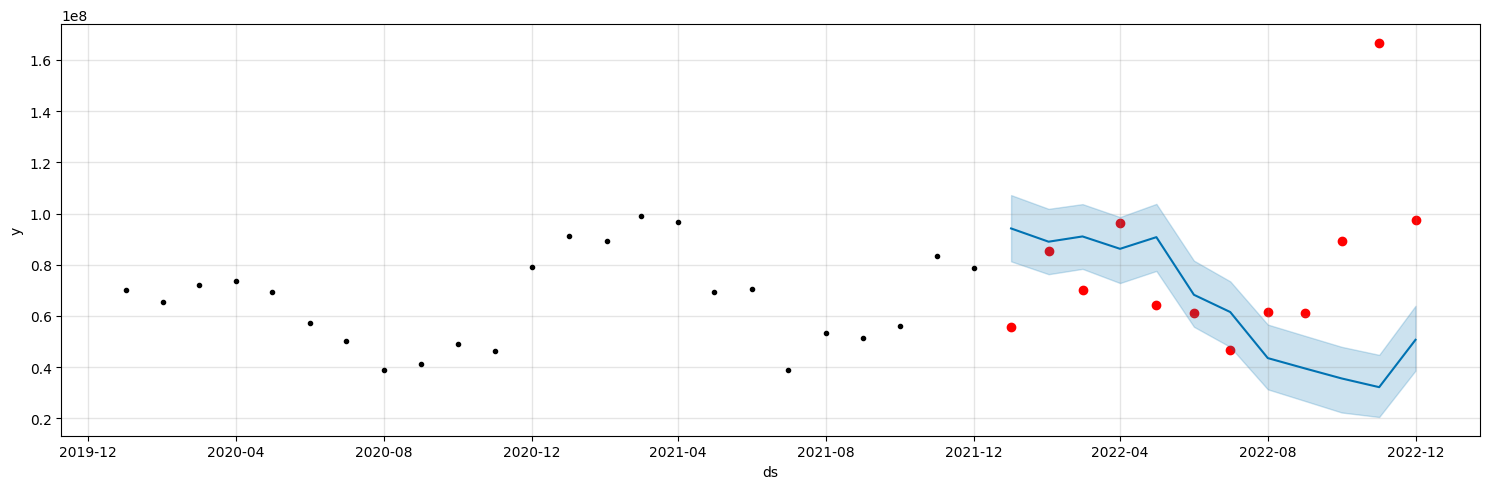

14:50:45 - cmdstanpy - INFO - Chain [1] start processing
14:50:45 - cmdstanpy - INFO - Chain [1] done processing


--------------------------------------------------
REPEATER Rate
**************************************************
(24, 7) (12, 7) (36, 7)


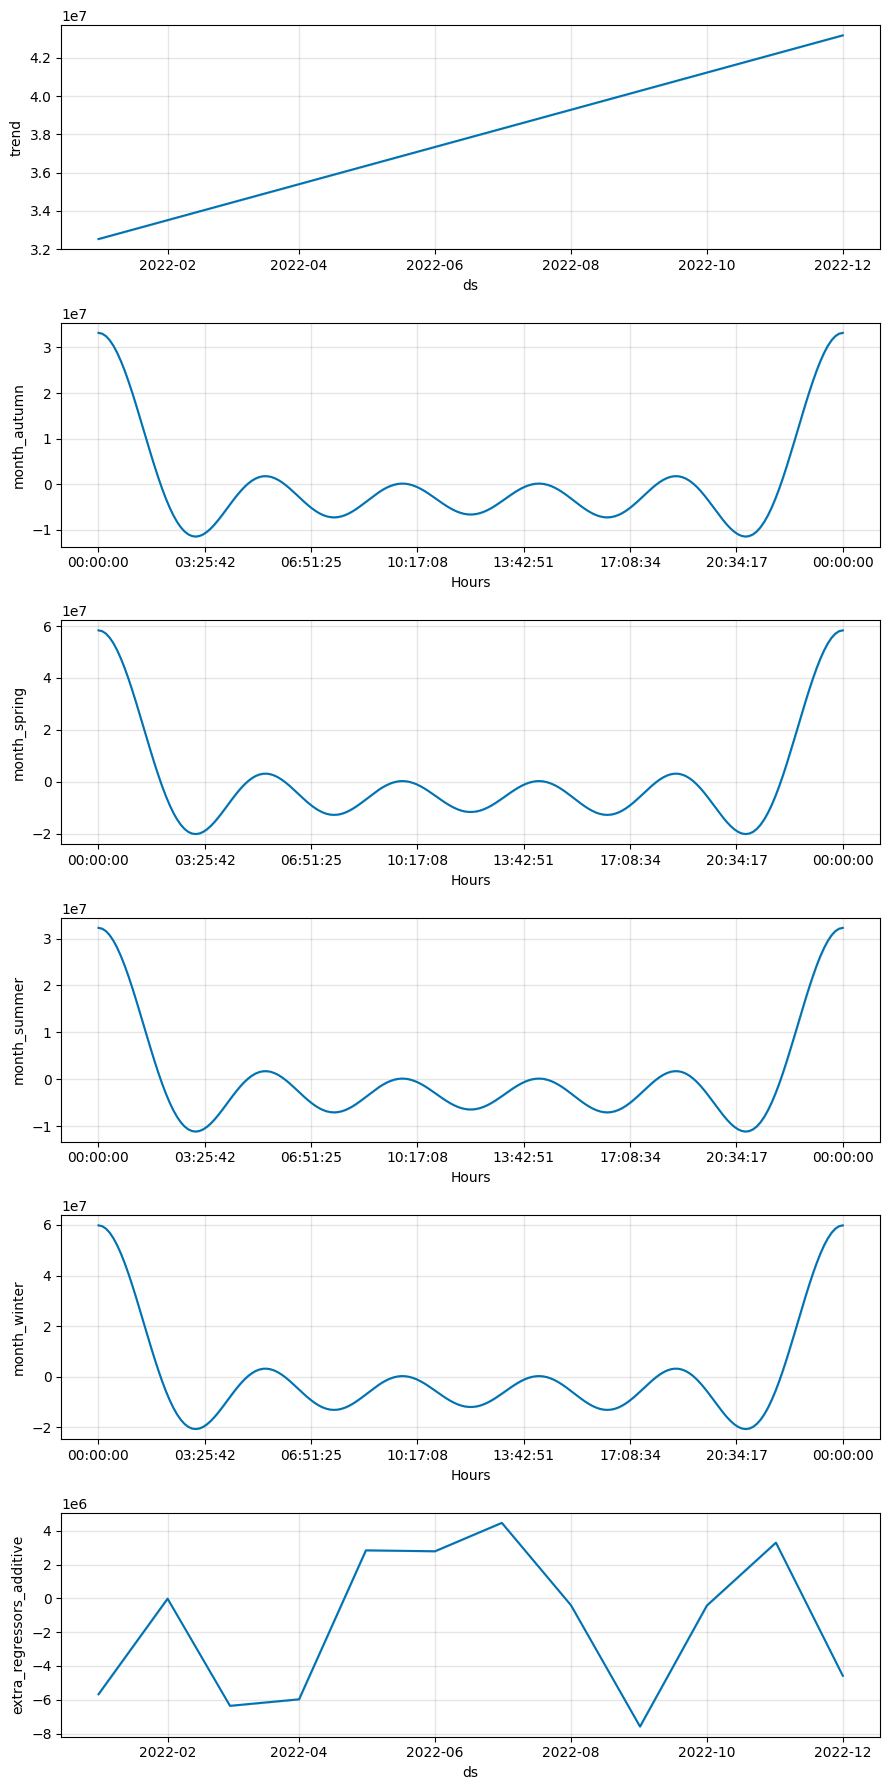

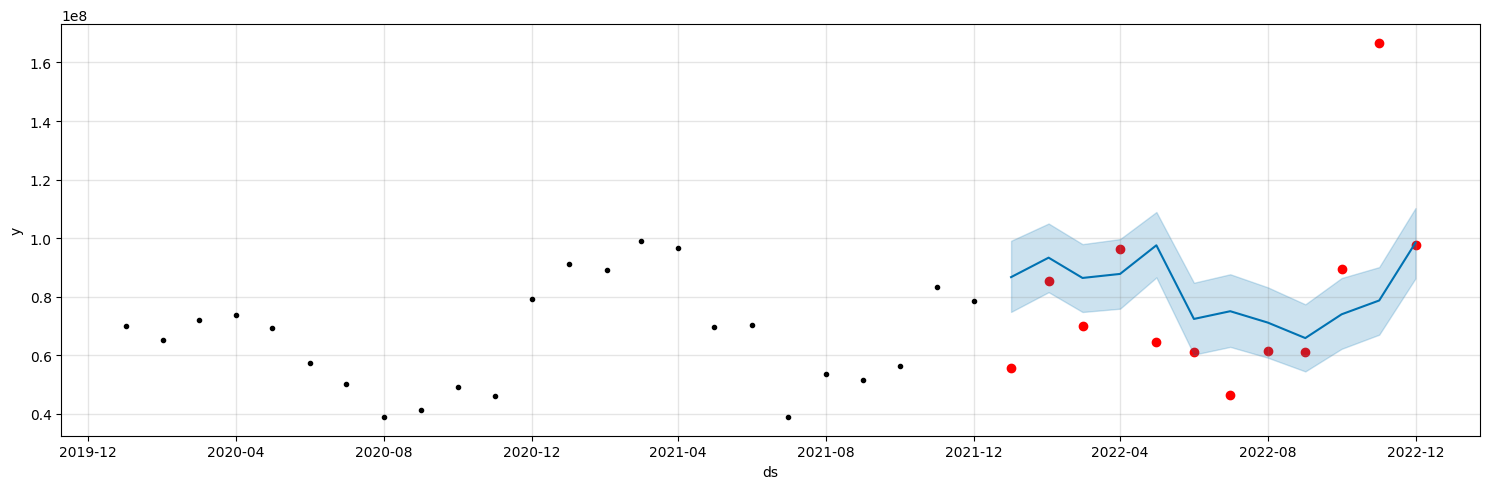

14:50:46 - cmdstanpy - INFO - Chain [1] start processing
14:50:47 - cmdstanpy - INFO - Chain [1] done processing


--------------------------------------------------
Price (gr/tl)
**************************************************
(24, 7) (12, 7) (36, 7)


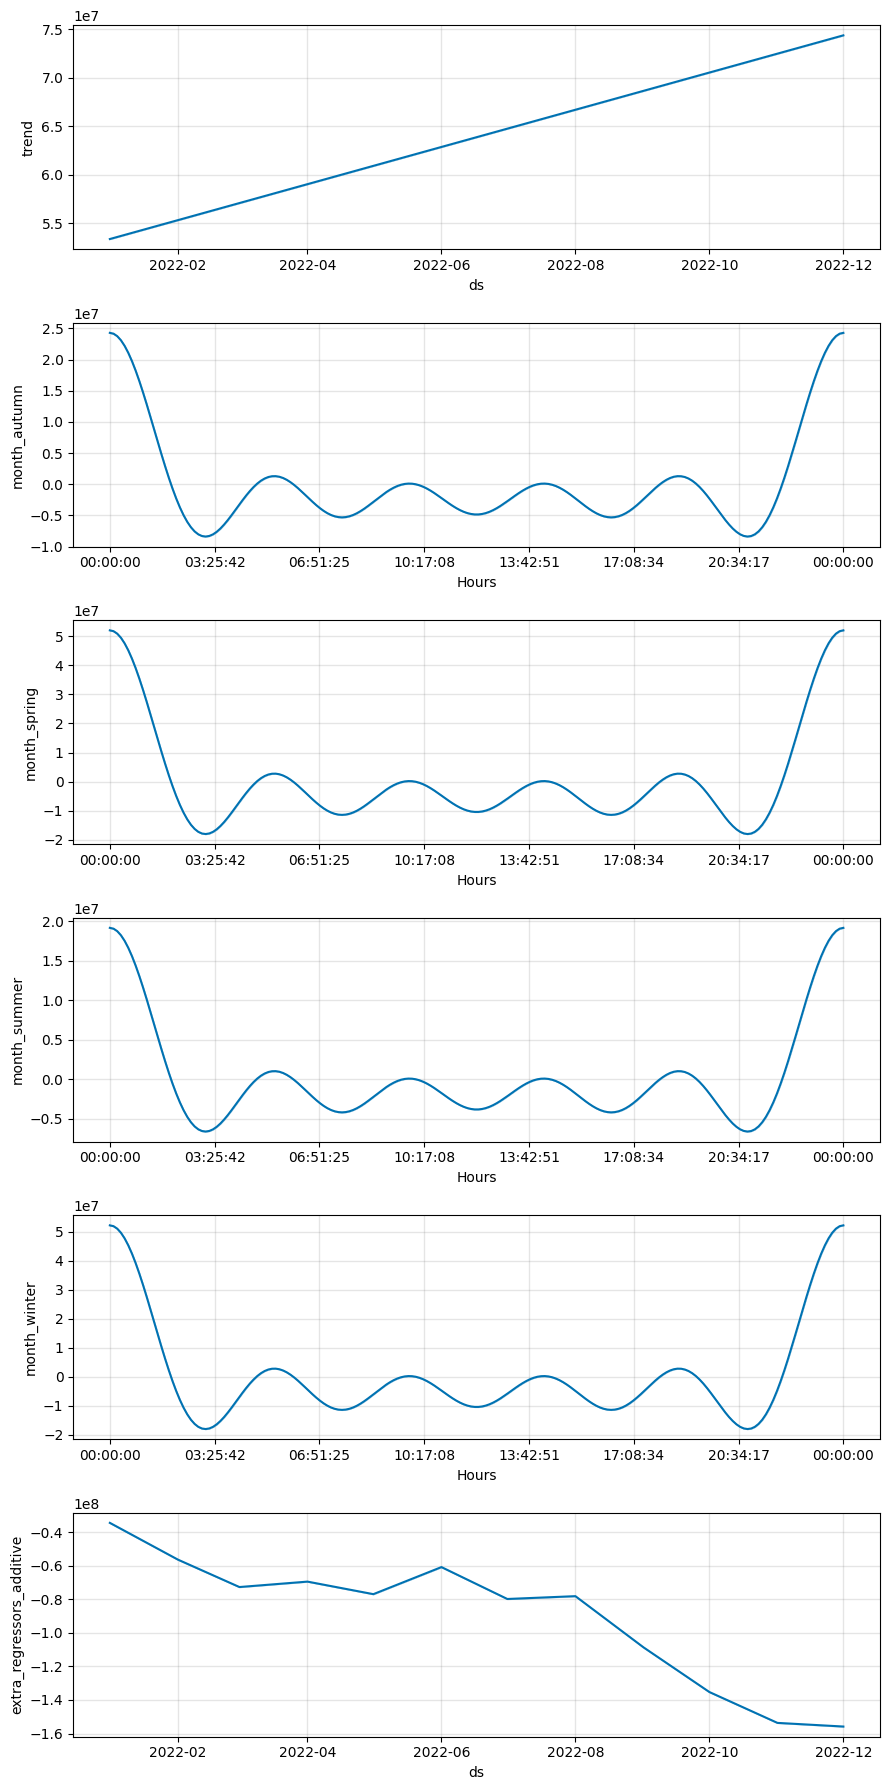

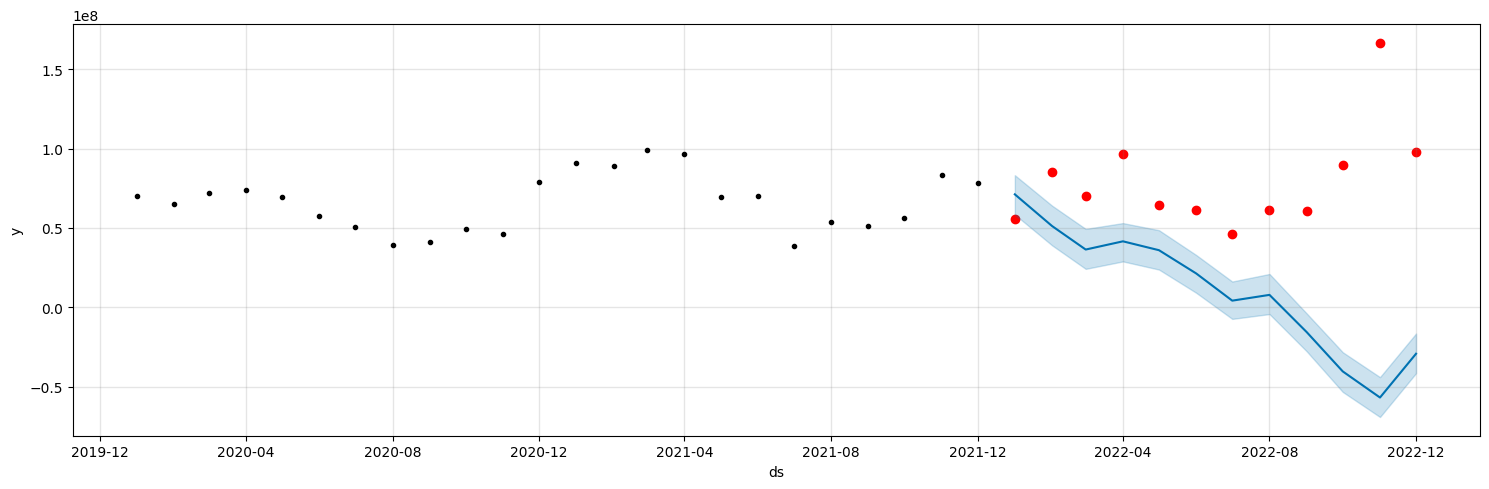

14:50:48 - cmdstanpy - INFO - Chain [1] start processing


--------------------------------------------------
No of Sku (barcode)
**************************************************
(24, 7) (12, 7) (36, 7)


14:50:49 - cmdstanpy - INFO - Chain [1] done processing


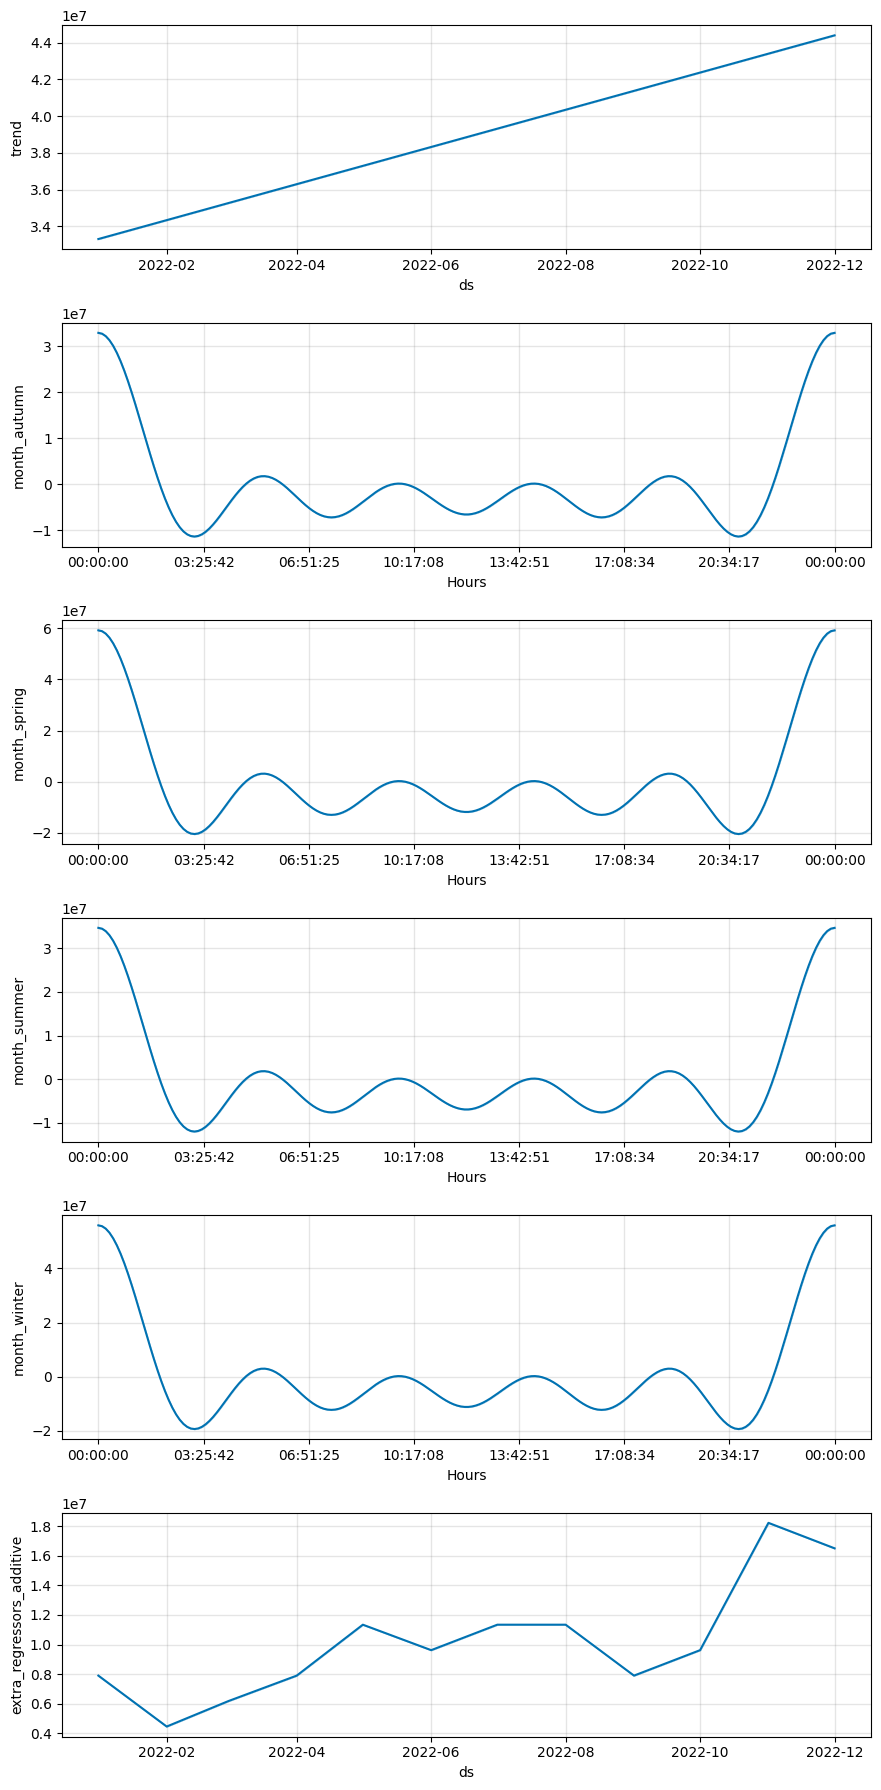

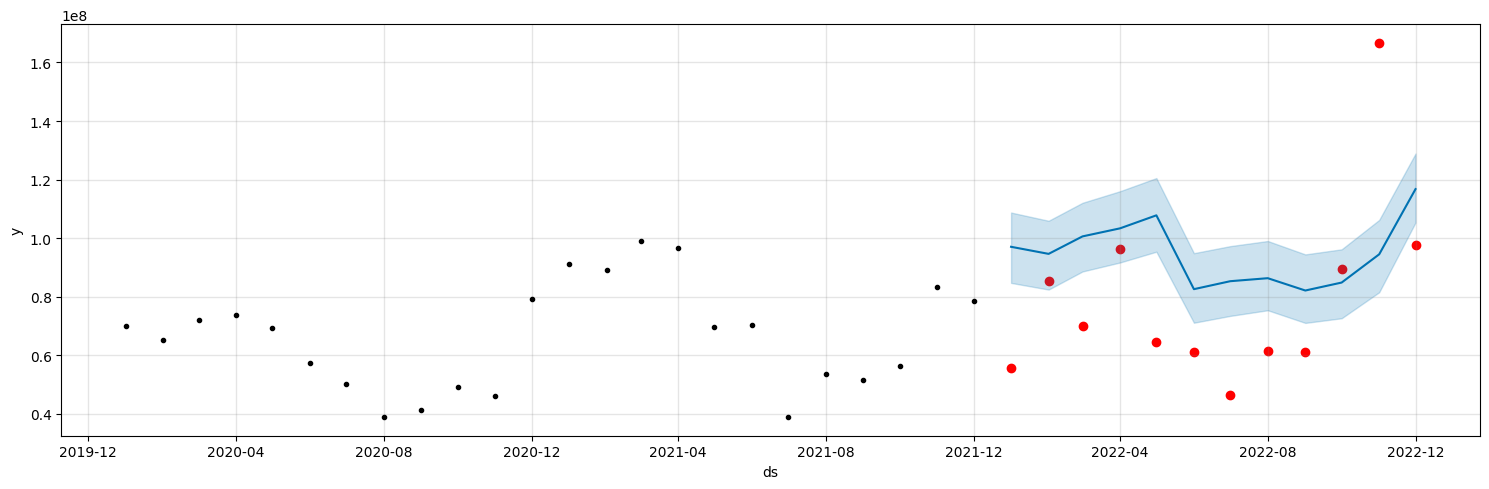

In [160]:
if(prophet):
    metric_list = ['TOM','Spontaneous Awareness', 'Awareness',
       'Ever Used', 'Trial', 'Repurchase', 'Most Often', 'Performance',
       'Yakınlık', 'Penetration', 'REPEATER Rate', 'Price (gr/tl)', 'No of Sku (barcode)']
    for i in metric_list:
        
        print("-"*50)
        print(i)
        print("*"*50)
        df_time = df[df["Metric"] == i].drop(["Company","Brand","Kategori","Metric Type","Metric"],axis = 1)
        import datetime

        start_date = datetime.datetime(2020, 1, 1)
        end_date = datetime.datetime(2022, 12, 1)

        months = []

        while start_date <= end_date:
            months.append(start_date.strftime("%m/%Y"))
            if start_date.month == 12:
                start_date = start_date.replace(year=start_date.year+1, month=1)
            else:
                start_date = start_date.replace(month=start_date.month+1)

        df_time.columns = months
        #print(df_time)
        df_time_prozy_y = pd.DataFrame(df_time.reset_index(drop=True).iloc[0])
        df_time_prozy_y["Time"] = df_time_prozy_y.index
        df_time_prozy_y.columns = ["y","ds"]
        df_time_prozy_y["ds"] = pd.to_datetime(df_time_prozy_y["ds"])
        tom = df_time_prozy_y
        df_time = df[df["Metric"] == "Volume (gr)"].drop(["Company","Brand","Kategori","Metric Type","Metric"],axis = 1)
        """ Ayrım"""
        import datetime

        start_date = datetime.datetime(2020, 1, 1)
        end_date = datetime.datetime(2022, 12, 1)

        months = []

        while start_date <= end_date:
            months.append(start_date.strftime("%m/%Y"))
            if start_date.month == 12:
                start_date = start_date.replace(year=start_date.year+1, month=1)
            else:
                start_date = start_date.replace(month=start_date.month+1)

        df_time.columns = months
        df_time_prozy_y = pd.DataFrame(df_time.loc[13])
        df_time_prozy_y["Time"] = df_time_prozy_y.index
        df_time_prozy_y.columns = ["y","ds"]
        df_time_prozy_y["ds"] = pd.to_datetime(df_time_prozy_y["ds"])
        tom.fillna(0,inplace=True)
        df_time_prozy_y[f"reg_{i}"] = tom["y"]
        
        def is_spring(ds):
            date = pd.to_datetime(ds)
            return (date.month >= 3) & (date.month <= 5)

        def is_summer(ds):
            date = pd.to_datetime(ds)
            return (date.month >= 6) & (date.month <= 8)

        def is_autumn(ds):
            date = pd.to_datetime(ds)
            return (date.month >= 9) & (date.month <= 11)

        def is_winter(ds):
            date = pd.to_datetime(ds)
            return (date.month >= 12) | (date.month <= 2)

        df_time_prozy_y['is_spring'] = df_time_prozy_y['ds'].apply(is_spring)
        df_time_prozy_y['is_summer'] = df_time_prozy_y['ds'].apply(is_summer)
        df_time_prozy_y['is_autumn'] = df_time_prozy_y['ds'].apply(is_autumn)
        df_time_prozy_y['is_winter'] = df_time_prozy_y['ds'].apply(is_winter)


        train =df_time_prozy_y[df_time_prozy_y.ds <"2021-12-31"]
        test =df_time_prozy_y[df_time_prozy_y.ds >"2021-12-31"]
        print(train.shape,test.shape,df_time_prozy_y.shape)

        model = Prophet()
        model.add_seasonality(name='month_spring', 
                                        period=1,
                                        fourier_order=5, 
                                        condition_name='is_spring')
        model.add_seasonality(name='month_summer', 
                                        period=1,
                                        fourier_order=5, 
                                        condition_name='is_summer')
        model.add_seasonality(name='month_autumn', 
                                        period=1,
                                        fourier_order=5, 
                                        condition_name='is_autumn')
        model.add_seasonality(name='month_winter', 
                                        period=1,
                                    fourier_order=5, 
                                    condition_name='is_winter')
        model.add_regressor(f'reg_{i}')

        model.fit(train)
        pred = model.predict(test)
        model.plot_components(pred)
        pred["y"] = test.reset_index()["y"].astype(float)
        # Plot the forecast with the actuals
        f, ax = plt.subplots(1)
        f.set_figheight(5)
        f.set_figwidth(15)
        ax.scatter(pred.ds, pred['y'], color='r')
        fig = model.plot(pred, ax=ax)
        plt.show()
        pred=pd.DataFrame(["2023-01-01",
        "2023-02-01",
        "2023-03-01",
        "2023-04-01",
        "2023-05-01",
        "2023-06-01",
        "2023-07-01",
        "2023-08-01"],columns=["ds"])
        pred.ds = pd.to_datetime(pred.ds)

